In [1]:
#from synthetic_data import return_normalized_data_synthetic,plot_pca,plot_mask,plot_synthetic
from synthetic_data2 import return_synthetic_data,plot_synthetic
import sys  
sys.path.insert(0, "/".join(sys.path[0].split("/")[0:-2])+('/src'))
#from em_multi_spike._em_multi_spike import Multi_spike
from sisal.solver import Solver
from sisal.utils import normalize_train_test_full_loader
import argparse
from sisal.plot import Plot
import random
import numpy as np
import torch

/Users/pldelacour/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
centroids,SNR,mask,mask_to_name = return_synthetic_data()
print('centroids = ',centroids.shape)
print('SNR : ', SNR.shape)
print('mask : ', mask.shape)

centroids =  (238428, 212)
SNR :  (238428,)
mask :  (238428,)


In [3]:
train_loader, test_loader, full_index_loader = normalize_train_test_full_loader(centroids,mask,batch_size=32,alpha=SNR)

data_shape =  (358, 666)
#### Plot of spatial image
#### Plot spectra signals


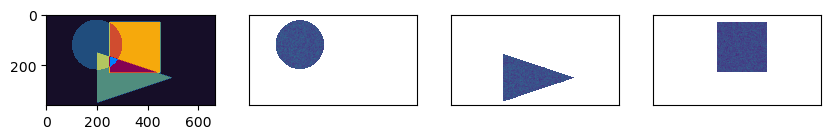

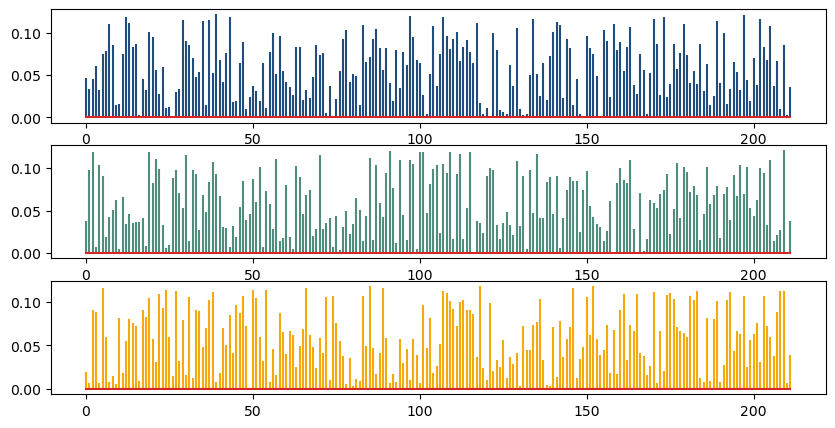

In [4]:
plot_synthetic()

## Arguments for the Beta VAE

In [5]:
args = argparse.Namespace(
    beta=4, 
    z_dim=2, 
    epochs=40,
    device ='cpu',
    save_model_epochs=False,
    save_loss = False,
    train=True)
in_size = centroids.shape[1]

In [6]:
# For reproducibility 

# Set a fixed seed
seed = 42
random.seed(seed)
np.random.seed(seed)
# torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)  # Ensures reproducibility across GPUs

# Ensure deterministic behavior
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

In [7]:
PATH = 'model_synthetic.pth' #path where the model is saved

In [ ]:
net = Solver(args,in_size)

In [ ]:
net.train(train_loader, test_loader,PATH) 

In [8]:
p = Plot(PATH,args.device,train_loader,test_loader,full_index_loader)

Compute Latent
End Compute latent


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


### Label = 
[0. 1. 2. 3. 4. 5. 6. 7.]
Using 38144 samples
n_col =  8
col_dict =  {0: '#160E28', 1: '#204D7D', 2: '#508D7E', 3: '#B3C65F', 4: '#F6A90C', 5: '#D04C2F', 6: '#850253', 7: [0.0, 0.5, 1.0, 1.0]}
mask_to_name =  {0: 'noise', 1: 'c', 2: 't', 3: 't+c', 4: 's', 5: 's+c', 6: 's+t', 7: 's+t+c'}


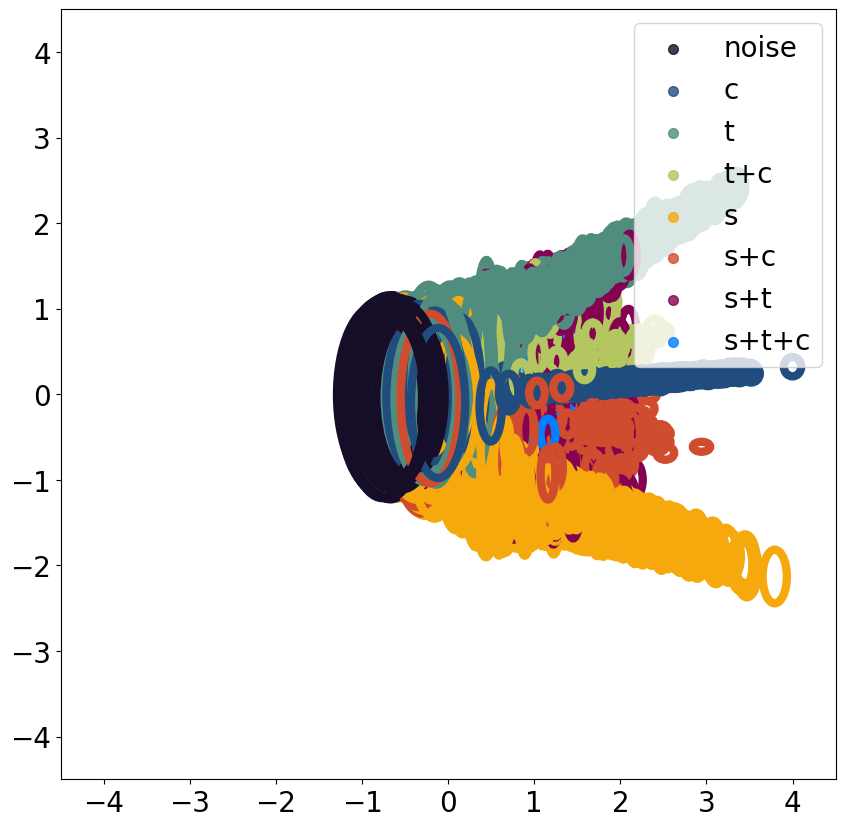

In [ ]:
p.plot_latent_dim_with_var(mask_to_name,p=0.5)